In [69]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

import matplotlib.pyplot as plt

import cv2

In [29]:
# using generators to use batch processing
train_data = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\soitb\OneDrive\Desktop\Datasets\cv_data\cats_v_dogs\dogs_vs_cats\train',
    labels='inferred', # inferred argument will generate labels from directory structure
    label_mode='int',
    batch_size=32,
    image_size=(256,256) # to resize the image and make data uniform throughout
)

Found 20000 files belonging to 2 classes.


In [30]:
test_data = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\soitb\OneDrive\Desktop\Datasets\cv_data\cats_v_dogs\dogs_vs_cats\test',
    labels='inferred', # inferred argument will generate labels from directory structure
    label_mode='int',
    batch_size=32,
    image_size=(256,256) # to resize the image and make data uniform throughout
)

Found 5000 files belonging to 2 classes.


In [31]:
# Since the pixel values of the dataset lies in between 0 and 255
# to convert the pizel values between 0 and 1 we will use normalization
def data_normal(img,label):
    img = tf.cast(img/255. ,tf.float32)
    return img,label

In [32]:
train_data = train_data.map(data_normal)
test_data = test_data.map(data_normal)

CNN model architecture

**Convolution Layer:**

- kernal_size = window size
- padding = valid    means no padding
- input shape = (rows,cols,chnnels)   
    - where channel is 3 as coplured image have 3 channels red, blue, green, similarly grayscale is single channeled image as each pizex is described as intensity of light.

**Pooling Layer:**

Pooling is mainly used to reduce the dimension of feature maps and so accelerates the training time as the parameters are reduced
also it helps to learn crucial features by removing outliars and invariances

- pool_size = window size from which max value is taken
- strides = how far the pooling window moves for each pooling step
    - it compresses the data

https://www.baeldung.com/cs/cnn-channels

In [35]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)      

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 1072s 2s/step - loss: 0.6449 - accuracy: 0.6243 - val_loss: 0.5720 - val_accuracy: 0.7112
Epoch 2/10
625/625 [==============================] - 1034s 2s/step - loss: 0.5007 - accuracy: 0.7535 - val_loss: 0.4731 - val_accuracy: 0.7776
Epoch 3/10
625/625 [==============================] - 1054s 2s/step - loss: 0.3951 - accuracy: 0.8199 - val_loss: 0.4718 - val_accuracy: 0.7992
Epoch 4/10
625/625 [==============================] - 1086s 2s/step - loss: 0.2838 - accuracy: 0.8782 - val_loss: 0.5656 - val_accuracy: 0.7936
Epoch 5/10
625/625 [==============================] - 1087s 2s/step - loss: 0.1639 - accuracy: 0.9340 - val_loss: 0.7791 - val_accuracy: 0.7878
Epoch 6/10
625/625 [==============================] - 1086s 2s/step - loss: 0.1069 - accuracy: 0.9602 - val_loss: 0.9508 - val_accuracy: 0.7634
Epoch 7/10
625/625 [==============================] - 1049s 2s/step - loss: 0.0644 - accuracy: 0.9771 - val_loss: 1.1107 - val_accuracy:

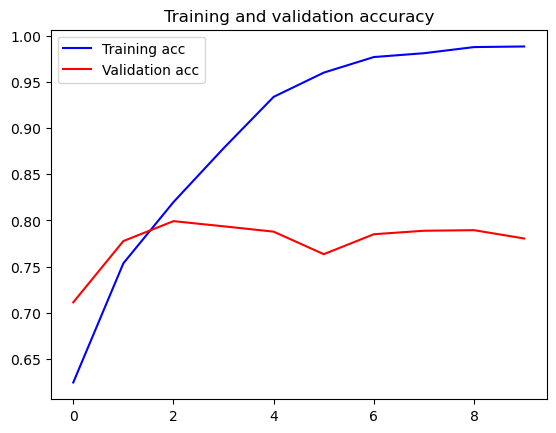

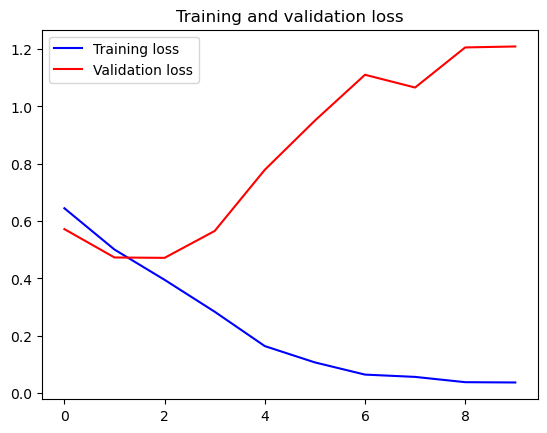

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1,activation='sigmoid'))


In [44]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [46]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history2 = model2.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 1604s 3s/step - loss: 1.2100 - accuracy: 0.5597 - val_loss: 0.7938 - val_accuracy: 0.5248
Epoch 2/10
625/625 [==============================] - 1616s 3s/step - loss: 0.6436 - accuracy: 0.6135 - val_loss: 0.8552 - val_accuracy: 0.5562
Epoch 3/10
625/625 [==============================] - 1616s 3s/step - loss: 0.5689 - accuracy: 0.6947 - val_loss: 0.6583 - val_accuracy: 0.6370
Epoch 4/10
625/625 [==============================] - 1628s 3s/step - loss: 0.4866 - accuracy: 0.7465 - val_loss: 0.6296 - val_accuracy: 0.6220
Epoch 5/10
625/625 [==============================] - 1620s 3s/step - loss: 0.4342 - accuracy: 0.7796 - val_loss: 0.4424 - val_accuracy: 0.7890
Epoch 6/10
625/625 [==============================] - 1619s 3s/step - loss: 0.3894 - accuracy: 0.8012 - val_loss: 0.4376 - val_accuracy: 0.8080
Epoch 7/10
625/625 [==============================] - 1608s 3s/step - loss: 0.3330 - accuracy: 0.8260 - val_loss: 0.4639 - val_accuracy:

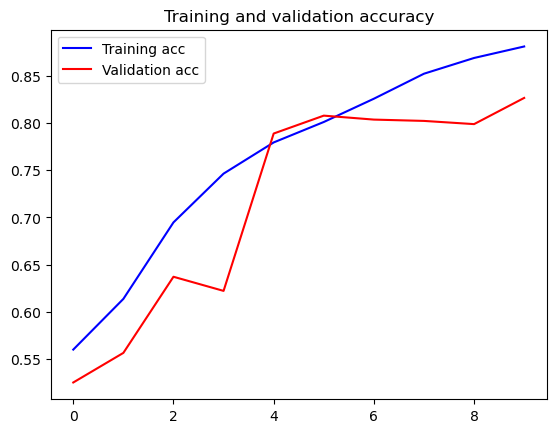

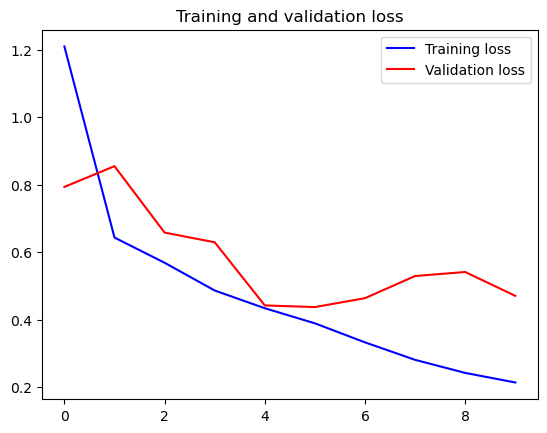

In [51]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'b', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'b', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As seen in the accuracy and loss plot the overfitting issue have been taken care of by using
- Batch Noramalization &
- Dropout Layers

**Prediction**

In [66]:
def prediction(img):
    out = model2.predict(img)
    if out>0.5:
        return "This is a dog"
    else:
        return "This is a cat"

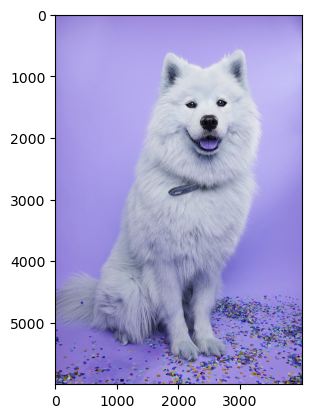

In [85]:
d1 = cv2.imread(r"C:\Users\soitb\OneDrive\Desktop\Datasets\CV_data\cats_v_dogs\dog2.jpg")
plt.imshow(d1)

In [86]:
d1.shape

(6000, 4000, 3)

In [87]:
d1 = cv2.resize(d1,(256,256))
d1.shape

(256, 256, 3)

In [88]:
inp_d1 = d1.reshape((1,256,256,3))

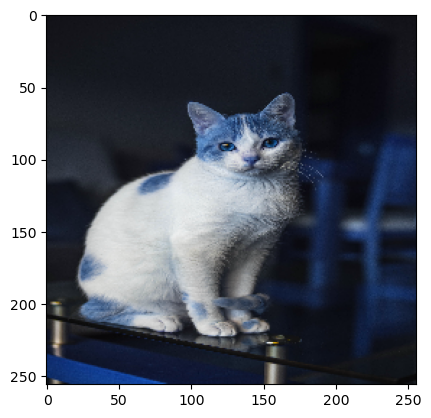

In [95]:
c1 = cv2.imread(r"C:\Users\soitb\OneDrive\Desktop\Datasets\CV_data\cats_v_dogs\cat3.jpg")
plt.imshow(c1)

c1 = cv2.resize(c1,(256,256))
plt.imshow(c1)

inp_c1 = c1.reshape((1,256,256,3))

In [96]:
prediction(inp_d1)

1/1 [==============================] - 0s 51ms/step


'This is a dog'

In [97]:
prediction(inp_c1)

1/1 [==============================] - 0s 49ms/step


'This is a cat'

**Resources:**

- https://www.baeldung.com/cs/cnn-channels
- https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
- https://www.youtube.com/watch?v=0K4J_PTgysc&list=PLKnIA16_RmvY5eP91BGPa0vXUYmIdtfPQ&index=22